In [166]:
### import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### carico i dati
df = pd.read_csv('life_SENZA_NaN.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1397 non-null   int64  
 1   Country                          1397 non-null   object 
 2   Year                             1397 non-null   int64  
 3   Status                           1397 non-null   object 
 4   Life expectancy                  1397 non-null   float64
 5   Adult Mortality                  1397 non-null   float64
 6   infant deaths                    1397 non-null   int64  
 7   Alcohol                          1397 non-null   float64
 8   percentage expenditure           1397 non-null   float64
 9   Hepatitis B                      1397 non-null   float64
 10  Measles                          1397 non-null   int64  
 11   BMI                             1397 non-null   float64
 12  under-five deaths   

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
### train/test split
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

# EDA

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 301 to 885
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1047 non-null   object 
 1   Year                             1047 non-null   int64  
 2   Status                           1047 non-null   object 
 3   Life expectancy                  1047 non-null   float64
 4   Adult Mortality                  1047 non-null   float64
 5   infant deaths                    1047 non-null   int64  
 6   Alcohol                          1047 non-null   float64
 7   percentage expenditure           1047 non-null   float64
 8   Hepatitis B                      1047 non-null   float64
 9   Measles                          1047 non-null   int64  
 10   BMI                             1047 non-null   float64
 11  under-five deaths                1047 non-null   int64  
 12  Polio              

In [8]:
train_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1047.000000,1047.000000,1047.00000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000
mean,2007.888252,69.327316,168.99618,30.578797,4.466896,680.364482,80.221585,2030.842407,37.945941,41.526266,84.160458,5.961289,84.721108,1.998185,5434.718661,1.540309e+07,4.934384,4.913372,0.632828,12.133333
std,4.162558,8.981363,125.88145,108.969365,4.012495,1696.815768,24.814774,9019.318104,19.849629,146.849642,21.600648,2.263994,20.732259,6.204167,11017.233141,7.100784e+07,4.686466,4.692172,0.181526,2.776662
min,2000.000000,44.000000,1.00000,0.000000,0.010000,0.000000,2.000000,0.000000,2.100000,0.000000,4.000000,0.740000,4.000000,0.100000,5.668726,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.650000,78.50000,1.000000,0.670000,36.649041,75.000000,0.000000,19.450000,1.000000,81.000000,4.410000,82.000000,0.100000,445.709149,2.137455e+05,1.600000,1.600000,0.509000,10.400000
50%,2008.000000,71.700000,148.00000,3.000000,3.660000,137.259194,91.000000,15.000000,43.600000,4.000000,93.000000,5.850000,93.000000,0.100000,1577.457182,1.457295e+06,3.100000,3.100000,0.674000,12.300000
75%,2012.000000,74.900000,225.50000,22.000000,7.305000,483.955237,96.000000,389.000000,56.100000,30.000000,97.000000,7.470000,97.000000,0.600000,4714.748030,7.737460e+06,7.200000,7.150000,0.752500,14.000000
max,2015.000000,89.000000,723.00000,1500.000000,17.870000,17028.527980,99.000000,118712.000000,76.700000,2000.000000,99.000000,13.660000,99.000000,50.600000,115761.577000,1.293859e+09,27.200000,28.100000,0.933000,20.700000


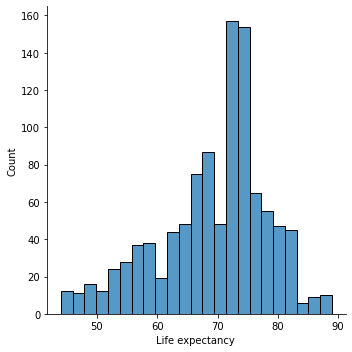

In [9]:
### target
target_name = 'Life expectancy '

sns.displot(train_df[target_name])

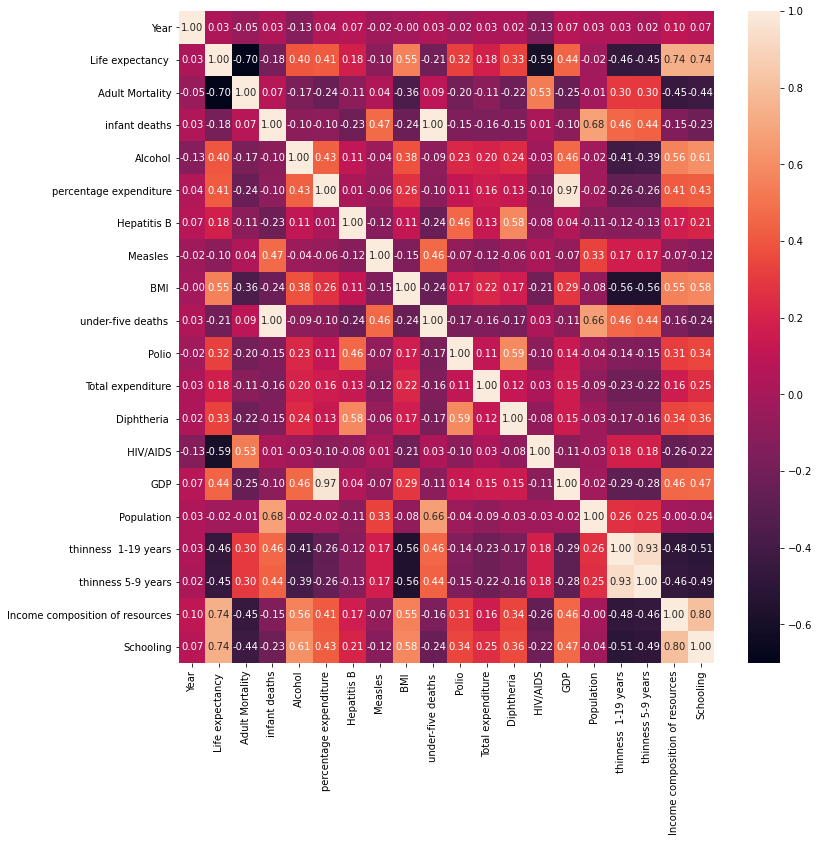

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')
plt.show()

## Features importances con Pearson corr

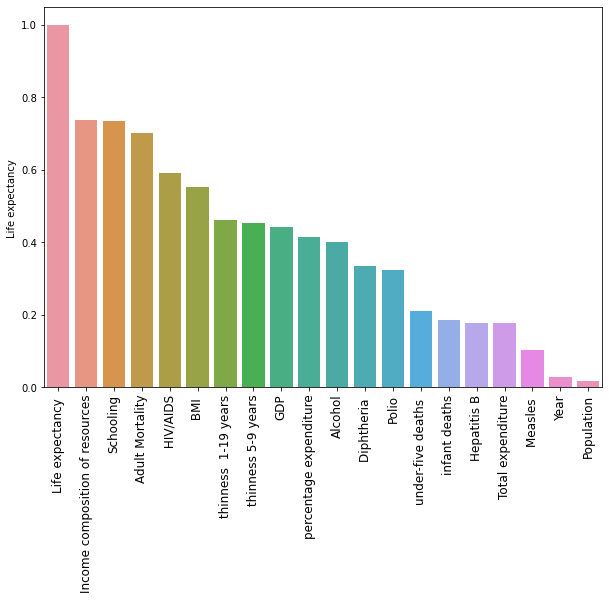

In [11]:
corr_matrix = train_df.corr()
sale_corr = corr_matrix[target_name].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [12]:
categorical_features = train_df[[col for col in train_df.columns if train_df[col].dtype==object]].columns

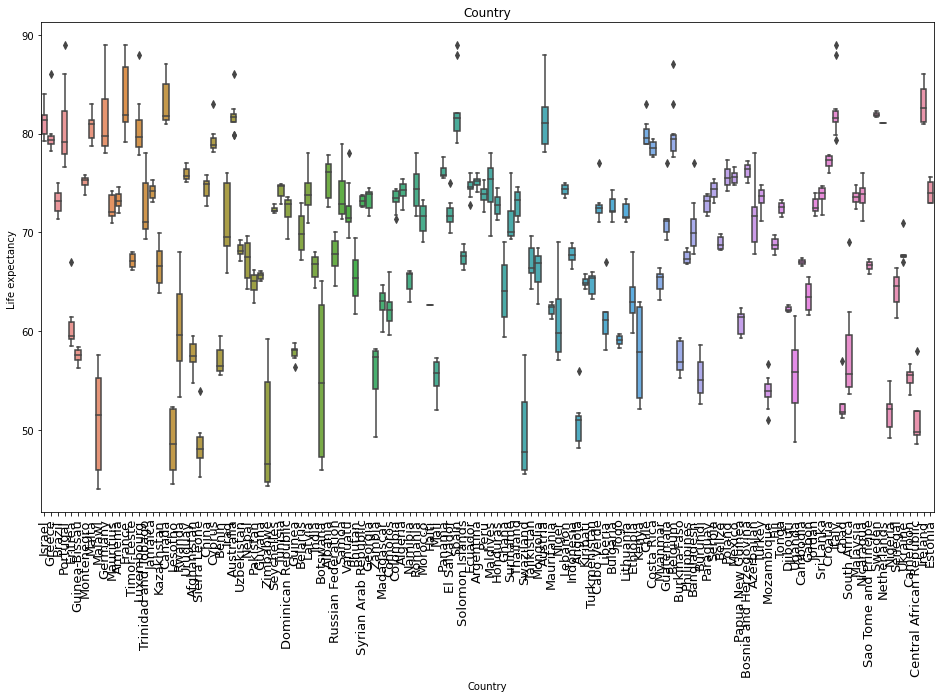

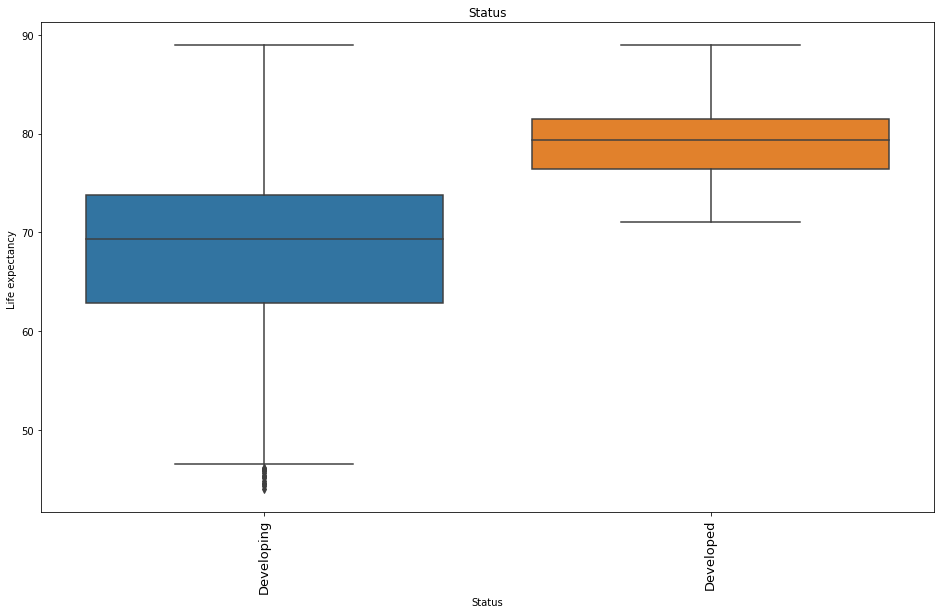

In [13]:
### YearBuilt VS SalePrice

for feature in categorical_features:
  plt.figure(figsize=(16,9))
  sns.boxplot(x=feature, y=target_name, data=train_df)
  plt.title(feature)
  plt.xticks(rotation=90, fontsize=13);

In [14]:
### metto in ordine per paese, così, per curiosità
country_dict = dict()
for country in set(train_df['Country']):
  country_dict[country] = train_df[train_df['Country']==country][target_name].mean()

In [15]:
country_series = pd.Series(country_dict)
country_series.sort_values(ascending=False)

France          83.650000
Ireland         83.050000
Canada          83.037500
Italy           82.346154
Spain           82.263636
                  ...    
Angola          50.828571
Swaziland       49.600000
Zimbabwe        49.461538
Lesotho         48.725000
Sierra Leone    48.614286
Length: 132, dtype: float64

## Features importances con Random Forest

In [23]:
### fitting
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(train_df.drop([target_name]+list(categorical_features), axis=1), train_df[target_name])

In [24]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

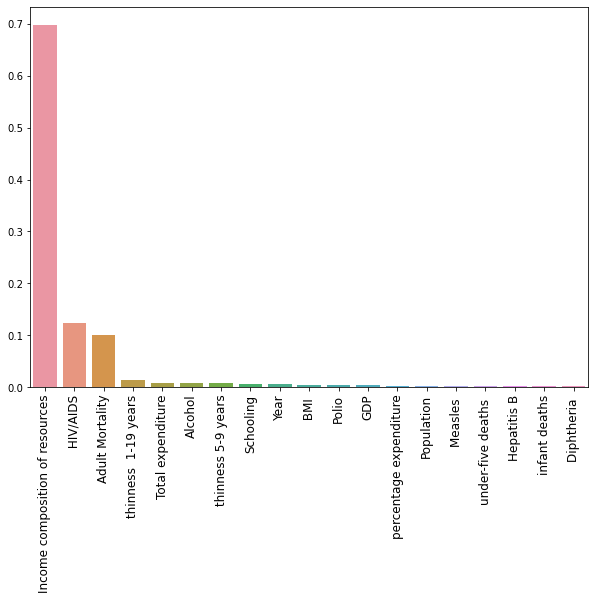

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()

# MODELING

## Features Selection

In [127]:
importances

Income composition of resources    0.698095
 HIV/AIDS                          0.124190
Adult Mortality                    0.099977
 thinness  1-19 years              0.013917
Total expenditure                  0.008637
Alcohol                            0.007248
 thinness 5-9 years                0.007081
Schooling                          0.006991
Year                               0.005377
 BMI                               0.004435
Polio                              0.003377
GDP                                0.003375
percentage expenditure             0.003023
Population                         0.002769
Measles                            0.002581
under-five deaths                  0.002570
Hepatitis B                        0.002377
infant deaths                      0.002082
Diphtheria                         0.001898
dtype: float64

In [130]:
features = list(importances[:3].index)

In [131]:
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

## Models

### Linear Regression

In [132]:
### LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

0.7721319181221389
0.6967530059730366


### k-NN

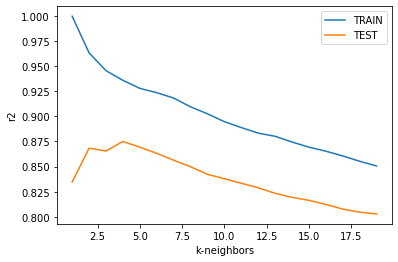

In [133]:
### LINEAR REGRESSION

from sklearn.neighbors import KNeighborsRegressor

r2_train_list = list()
r2_test_list = list()
for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors=k)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(range(1,20), r2_train_list, label='TRAIN')
plt.plot(range(1,20), r2_test_list, label='TEST')
plt.xlabel('k-neighbors')
plt.ylabel('r2')
plt.legend()
plt.show()

In [74]:
k=4
model = KNeighborsRegressor(n_neighbors=k)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.956828686580158
0.9021329902021137


### Random Forest

100%|██████████| 19/19 [00:05<00:00,  3.18it/s]


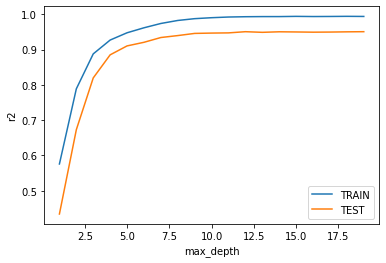

In [75]:
### TUNING max_depth

from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

r2_train_list = list()
r2_test_list = list()
max_depth_range = range(1,20)

for d in tqdm(max_depth_range):
    model = RandomForestRegressor(max_depth=d)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(max_depth_range, r2_train_list, label='TRAIN')
plt.plot(max_depth_range, r2_test_list, label='TEST')
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend()
plt.show()

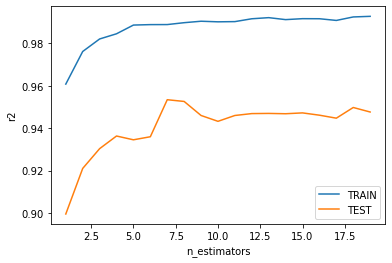

In [76]:
### TUNING n_estimators

r2_train_list = list()
r2_test_list = list()
n_estimators_range = range(1,20)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]


plt.plot(n_estimators_range, r2_train_list, label='TRAIN')
plt.plot(n_estimators_range, r2_test_list, label='TEST')
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.legend()
plt.show()

In [134]:
### final model

model = RandomForestRegressor(n_estimators=10, max_depth=7)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.9630440086491562
0.9249240093583204


## Previsioni Finali

In [78]:
hold_out_df = pd.read_csv('life_hold_out.csv')

In [79]:
### predictions
X_hold_out = hold_out_df[features].copy()
new_predictions = model.predict(X_hold_out)
new_predictions = pd.Series(new_predictions, index=hold_out_df.index)

In [123]:
targets = pd.read_csv('life_hold_out_targets.csv')['Life expectancy ']

Predictions
----------------
MAPE: 0.02%
R2:   0.93


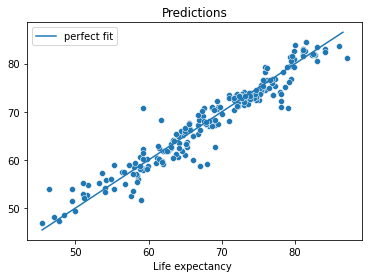

In [125]:
metrics = evaluate(targets, new_predictions, title='Predictions', plots=True, verbose=True)

# CROSS-VALIDATION

Per evitare problemi di overfitting è pratica comune usare un metodo chiamato 'cross-validation'. In pratica, in fase di fitting del modello, invece di fare un solo splitting tra dati di training e dati di test, si divide il dataset in più split e si valutano le performance del modello per ogni split. Scikit-learn integra già delle funzioni di cross-validation in ogni modello.

## K-Fold

In [209]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2'], return_train_score=True)

In [210]:
display(results)

{'fit_time': array([0.01703453, 0.01396656, 0.01496744, 0.01499963, 0.0139997 ,
        0.00706935, 0.02024555, 0.01566124, 0.01567006, 0.01559424,
        0.01565838, 0.01559162, 0.02008963, 0.02467847, 0.01700091,
        0.01600075, 0.01396513, 0.01400137, 0.01403213, 0.01500034]),
 'score_time': array([0.00199819, 0.00203252, 0.00200033, 0.00199986, 0.00200057,
        0.        , 0.        , 0.00904226, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00199842, 0.00202942,
        0.00199986, 0.00199986, 0.00300074, 0.00296688, 0.00100017]),
 'test_r2': array([0.95647741, 0.90462341, 0.92637647, 0.92174706, 0.92047361,
        0.89610964, 0.91226399, 0.96332441, 0.88572895, 0.90171709,
        0.90286157, 0.88292499, 0.96534444, 0.91668888, 0.96287077,
        0.95154619, 0.94433731, 0.93948644, 0.92469194, 0.94512674]),
 'train_r2': array([0.96305322, 0.96316421, 0.96264128, 0.9641743 , 0.96493947,
        0.96412433, 0.96379938, 0.96199612, 0.96467895, 0.962

In [211]:
### Per trovare il valore finale mi basta fare una media:

train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.963
Test r2:  0.926


In [212]:
### Volendo posso anche farmi dare più metriche di scoring dalla cross-validation. Per vedere tutte quelle predefinite basta eseguire questo snippet

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [213]:
### con due metriche di scoring
results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2','neg_mean_absolute_error'], return_train_score=True)
display(results)

{'fit_time': array([0.01602101, 0.01499891, 0.01700139, 0.01399922, 0.01499963,
        0.00335622, 0.00439954, 0.01566052, 0.01354599, 0.01567149,
        0.01559496, 0.01565838, 0.01998472, 0.01566052, 0.00201106,
        0.        , 0.01562428, 0.01969504, 0.01220345, 0.01717043]),
 'score_time': array([0.00196981, 0.00201321, 0.00199819, 0.00200081, 0.00200033,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.015625  , 0.        , 0.00200033, 0.        , 0.        ]),
 'test_r2': array([0.95123812, 0.90539453, 0.93943427, 0.90926381, 0.90104785,
        0.88730798, 0.90741034, 0.97060203, 0.89103607, 0.91666695,
        0.89715946, 0.88096121, 0.96385564, 0.93137109, 0.9654171 ,
        0.9502419 , 0.93688968, 0.94181756, 0.93175817, 0.93851383]),
 'train_r2': array([0.96358074, 0.96358199, 0.96456125, 0.96468583, 0.96334381,
        0.9632716 , 0.96490302, 0.96250373, 0.96270984, 0.963

## ShuffleSplit

In [214]:
### Per cambiare metodo di splitting basta cambiare il parametro cv

from sklearn.model_selection import ShuffleSplit

results = cross_validate(model, X_train, y_train, cv=ShuffleSplit(n_splits=10), scoring=['r2'], return_train_score=True)
train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.965
Test r2:  0.931


## Model-selection con CV

Riprendendo il tuning di n_estimators...

100%|██████████| 19/19 [00:04<00:00,  3.92it/s]


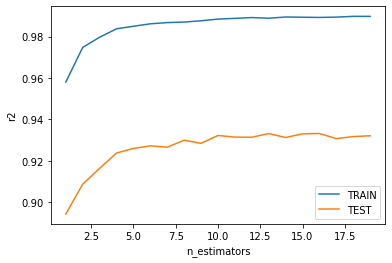

In [217]:
### TUNING n_estimators

r2_train_list = list()
r2_test_list = list()
n_estimators_range = range(1,20)

for n in tqdm(n_estimators_range):
    model = RandomForestRegressor(n_estimators=n)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=10), scoring=['r2'], return_train_score=True)
    train_r2 = np.mean(results['train_r2'])
    test_r2 = np.mean(results['test_r2'])

    r2_train_list += [train_r2]
    r2_test_list += [test_r2]


plt.plot(n_estimators_range, r2_train_list, label='TRAIN')
plt.plot(n_estimators_range, r2_test_list, label='TEST')
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.legend()
plt.show()

# HYPER-PARAMETERS TUNING

Come abbiamo visto il processo di tuning può essere fatto anche 'a spanne' valutando le performance di un modello al variare di ogni singolo  parametro del modello (vedi max_depth e n_estimators per il RandomForest). Quando però i parametri cominciano a essere molti, diventa difficile fare una valutazione oggettiva. Bisognerebbe poter valutare le performance del modello per ogni signola combinazione dei suoi iper-parametri. In effetti questo è proprio quello che fa GridSearchCV(): esegue la valutazione delle performance (in cross-validation, per questo c'è il CV) per ogni permutazione degli iper-parametri del modello.

Questo metodo è ovviamente molto dispendioso dal punto di vista computazionale, e diventa tanto più dispendioso quanto più aumentano i valori associati a ogni singolo parametro (il cosiddetto spazio dei parametri). Per questo esistono anche altri metodi per indirizzare la ricerca del miglior modello nello spazio dei parametri. Noi qui vedremo solo RandomizedSearchCV(), che di fatto non esegue ogni singola permutazione ma fa una ricerca 'randomizzata'.

## GridSearchCV()

In [242]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':np.arange(1,10), 
    'max_depth':np.arange(1,10),
    'max_features':['auto', 'sqrt', 'log2'],
    }

model = GridSearchCV(RandomForestRegressor(), param_grid=parameters, cv=KFold(n_splits=10), scoring='r2')

In [243]:
model = model.fit(X_train, y_train)

In [244]:
model.best_estimator_

RandomForestRegressor(max_depth=9, max_features='log2', n_estimators=7)

In [245]:
model.best_score_

0.9322166053866052

## RandomizedSearchCV()

In [247]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators':np.arange(1,10), 
    'max_depth':np.arange(1,10),
    'max_features':['auto', 'sqrt', 'log2']
    }


model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=parameters, cv=KFold(n_splits=10), scoring='r2')

In [248]:
model = model.fit(X_train, y_train)

In [249]:
model.best_estimator_

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=5)

In [250]:
model.best_score_

0.9225568745228708